In [ ]:
import numpy as np
import plotly.graph_objs as go

np.random.seed(42)

# Funkcja do generowania punktów spełniających określone warunki
def generate_points_for_class_0(n):
    points = []
    while len(points) < n:
        x, y, z = np.random.uniform(-1, 4, 3)
        if (-0.5 < x < 2.0 and  0.5 < y < 2.0 and 0 < z < 2.0) or (2.0 <= x < 4.0 and 1.0 < y < 1.5 and 1.0 < z < 2.5):
            points.append([x, y, z])
    return np.array(points)

def generate_points_for_class_1(n):
    points = []
    while len(points) < n:
        x, y, z = np.random.uniform(-1, 4, 3)
        if not ((-0.5 < x < 2.0 and  0.5 < y < 2.0 and 0 < z < 2.0) or (2.0 <= x < 4.0 and 1.0 < y < 1.5 and 1.0 < z < 2.5)):
            points.append([x, y, z])
    return np.array(points)

# Generowanie 10 punktów dla każdej klasy
class_0 = generate_points_for_class_0(10)
class_1 = generate_points_for_class_1(10)

# Tworzenie śladów dla klasy 0 i klasy 1
trace0 = go.Scatter3d(
    x=class_0[:, 0],
    y=class_0[:, 1],
    z=class_0[:, 2],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Klasa 0'
)

trace1 = go.Scatter3d(
    x=class_1[:, 0],
    y=class_1[:, 1],
    z=class_1[:, 2],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Klasa 1'
)

# Layout wykresu
layout = go.Layout(
    title='Interaktywny wykres 3D punktów dla dwóch klas',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

# Tworzenie figury
fig = go.Figure(data=[trace0, trace1], layout=layout)

# Wyświetlanie wykresu
fig.show()


## Drzewo Decyzyjne

Drzewo decyzyjne to algorytm stosowany w zadaniach klasyfikacji i regresji. Działa na zasadzie podziału zbioru danych na mniejsze podzbiory przy użyciu prostych reguł decyzyjnych, które są reprezentowane w postaci drzewa. Drzewo składa się z węzłów (które zawierają pytania dotyczące cech) oraz gałęzi (które odpowiadają na te pytania). Na końcu drzewa znajdują się liście, które zawierają decyzje (wyniki klasyfikacji).

### Budowa drzewa decyzyjnego:

1. **Korzeń drzewa (root)**: Pierwszy węzeł w drzewie, który zawiera pytanie dotyczące jednej z cech.
2. **Węzły wewnętrzne (internal nodes)**: Zawierają pytania o cechy i prowadzą do kolejnych węzłów.
3. **Liście (leaf nodes)**: Reprezentują decyzje, tj. klasę, do której należy dany przypadek.

---

## Entropia

Entropia to miara niepewności lub chaosu w zbiorze danych. W kontekście drzewa decyzyjnego mierzy się, jak "czysty" jest zbiór danych pod względem klas. Im większa entropia, tym większa niepewność w zbiorze.

### Jak liczymy entropię?

Entropię oblicza się za pomocą wzoru:

$$ H(S) = - \sum_{i=1}^{k} p_i \log_2(p_i) $$

gdzie:
- \( H(S) \) to entropia zbioru \( S \),
- \( p_i \) to prawdopodobieństwo klasy \( i \) w zbiorze danych,
- \( k \) to liczba klas w zbiorze danych.

Entropia wynosi 0, jeśli wszystkie elementy należą do jednej klasy (zbiór jest "czysty"). Przyjmijmy zbiór o 10 elementach, które należą do 1 klasy, a z drugiej klasy nie ma żadnego elementu:

$$H(s) = - \left( \frac{10}{10} \log_2(\frac{10}{10}) + \frac{0}{10} \log_2(\frac{0}{10}) \right) = 0$$

Z drugiej strony, jeśli klasy są równomiernie rozłożone, entropia osiąga swoje maksimum.

Przykład:
Jeśli mamy zbiór \( S \) składający się z 2 klas (0 i 1), a klasy są rozłożone równomiernie (tak jak w naszym przypadku), to:

$$ H(S) = - \left( \frac{10}{20} \log_2(\frac{10}{20}) + \frac{10}{20} \log_2(\frac{10}{20}) \right) = 1 $$

---

## Information Gain (Zysk Informacji)

Information Gain to miara, która wskazuje, jak dobrze dana cecha dzieli zbiór danych na mniejsze, bardziej jednorodne podzbiory. W skrócie, pokazuje, jak duża część niepewności (entropii) została usunięta po wykonaniu podziału na podstawie danej cechy.

### Jak liczymy Information Gain?

Information Gain obliczamy jako różnicę pomiędzy entropią zbioru przed podziałem a średnią ważoną entropii po podziale:

$$ IG(S, A) = H(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} H(S_v) $$

gdzie:
- \( H(S) \) to entropia zbioru przed podziałem,
- \( A \) to cecha, według której dzielimy zbiór,
- \( S_v \) to podzbiór danych, dla których cecha \( A \) przyjmuje wartość \( v \),
- \( |S_v| \) to liczba elementów w podzbiorze \( S_v \),
- \( |S| \) to liczba elementów w całym zbiorze.

Zysk informacji jest większy, gdy entropia zbioru po podziale jest mniejsza niż przed podziałem, ponieważ oznacza to, że podział dobrze oddzielił dane na klasy.

## Przykład obliczenia entropii i Information Gain

### Krok 1: Obliczenie entropii
Wiemy z wcześniejszego przykładu, że w naszym przypadku przed podziałem entropia wynosi \(H(S) = 1\).

### Krok 2: Podział zbioru według cechy
Następnie dzielimy zbiór według cechy, tu przyjmijmy \( y <= 0.457 \):
- Podzbiór `true`: 7 elementów: 0 klasy 0, 7 klasy 1,
- Podzbiór `false`: 13 elementó: 10 klasy 0, 7 klasy 1.

Następnie należy obliczyć entropię dla każdego podzbioru:
- Dla podzbioru `true` jest to \(H(S_{true}) = 0\),
- Dla podzbioru `false` jest to

$$ H(S_{false}) = - \left( \frac{10}{13} \log_2(\frac{10}{13}) + \frac{3}{13} \log_2(\frac{3}{13}) \right) \approx 0.779 $$

### Krok 3: Obliczenie Information Gain

$$ IG(S, x) = H(S) - \left( \frac{7}{20} H(S_{true}) + \frac{13}{20} H(S_{false}) \right) = 1 - (0.35 \times 0 + 0.65 \times 0.779) \approx 0.5 $$




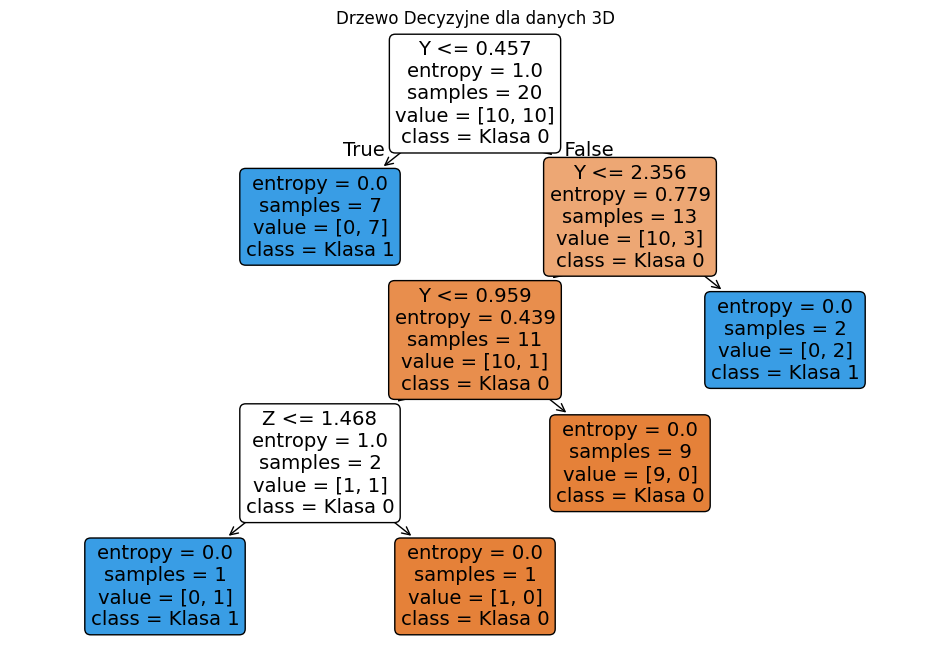

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Tworzenie i trenowanie drzewa decyzyjnego
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(points, y)

# Wizualizacja drzewa decyzyjnego
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=['X', 'Y', 'Z'],
    class_names=['Klasa 0', 'Klasa 1'],
    filled=True,
    rounded=True
)
plt.title("Drzewo Decyzyjne dla danych 3D")
plt.show()


In [ ]:
import numpy as np
import plotly.graph_objs as go

# Funkcja do obliczania entropii
def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

# Funkcja do obliczania Information Gain
def information_gain(y, y_left, y_right):
    H_before = entropy(y)
    H_after = (len(y_left) / len(y)) * entropy(y_left) + (len(y_right) / len(y)) * entropy(y_right)
    return H_before - H_after

# Funkcja do dzielenia danych
def split_data(points, y, axis, threshold):
    mask = points[:, axis] <= threshold
    left, right = points[mask], points[~mask]
    y_left, y_right = y[mask], y[~mask]
    return left, right, y_left, y_right

# Tworzenie zbioru danych
points = np.vstack((class_0, class_1))
y = np.array([0] * len(class_0) + [1] * len(class_1))

# Funkcja do tworzenia wykresu z płaszczyzną podziału i tytułem z entropią i IG
def plot_split_with_plane(points, y, axis, threshold, plane_title, plane_color='green'):
    # Podział danych
    left, right, y_left, y_right = split_data(points, y, axis, threshold)

    # Obliczanie entropii i Information Gain
    H_before = entropy(y)
    IG = information_gain(y, y_left, y_right)

    # Trace dla klasy 0
    trace0 = go.Scatter3d(
        x=points[y == 0][:, 0],
        y=points[y == 0][:, 1],
        z=points[y == 0][:, 2],
        mode='markers',
        marker=dict(size=5, color='red'),
        name='Klasa 0'
    )

    # Trace dla klasy 1
    trace1 = go.Scatter3d(
        x=points[y == 1][:, 0],
        y=points[y == 1][:, 1],
        z=points[y == 1][:, 2],
        mode='markers',
        marker=dict(size=5, color='blue'),
        name='Klasa 1'
    )

    # Tworzenie płaszczyzny podziału
    if axis == 1:  # Podział według y
        plane = go.Surface(
            z=[[0, 0], [4, 4]],
            x=[[-1, 4], [-1, 4]],
            y=[[threshold, threshold], [threshold, threshold]],
            opacity=0.5,
            colorscale=[[0, plane_color], [1, plane_color]],
            showscale=False
        )
    elif axis == 0:  # Podział według x
        plane = go.Surface(
            z=[[0, 0], [4, 4]],
            y=[[-1, 4], [-1, 4]],
            x=[[threshold, threshold], [threshold, threshold]],
            opacity=0.5,
            colorscale=[[0, plane_color], [1, plane_color]],
            showscale=False
        )

    # Tworzenie wykresu
    fig = go.Figure(data=[trace0, trace1, plane])
    fig.update_layout(
        title=f"{plane_title}<br>Entropia przed podziałem: {H_before:.4f}, IG: {IG:.4f}",
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        )
    )
    fig.show()

# Pierwszy podział przy y <= 2.0
plot_split_with_plane(points, y, axis=1, threshold=0.457, plane_title='Podział przy y <= 2.0')

# Drugi podział przy x <= 1.5
plot_split_with_plane(points, y, axis=0, threshold=1.5, plane_title='Podział przy x <= 1.5')


## Random Forest
to algorytm uczenia maszynowego oparty na zespole drzew decyzyjnych. Cechami tego algorytmu są:

 - Bootstrap - Każde drzewo w lesie jest trenowane na losowym podzbiorze danych wybranym z oryginalnego zbioru danych. Jest to tzw. bootstrap sampling (sampling z powtórzeniami). Oznacza to, że niektóre punkty mogą być powielone w danym drzewie, a inne w ogóle się nie pojawią.
 - Wybór losowych cech - W każdym węźle drzewa, do podziału danych wybierana jest tylko losowa podgrupa cech, co zmniejsza korelację między drzewami i sprawia, że model jest bardziej ogólny.
 - Głosowanie - Po zbudowaniu wszystkich drzew, klasyfikacja/regresja nowych danych odbywa się poprzez głosowanie. Każde drzewo w lesie daje swoją prognozę, a ostateczna klasyfikacja jest wynikiem większościowego głosowania drzew w lesie, a w przypadku regresji jest to średnia wartość z każdego drzewa.

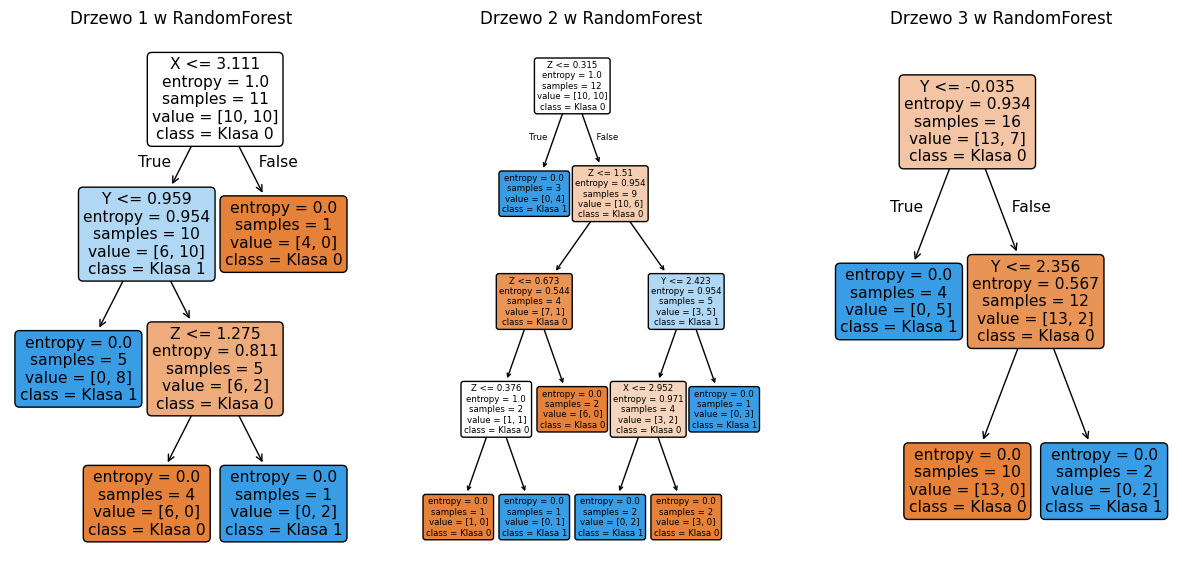

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Tworzenie i trenowanie RandomForestClassifier z 3 drzewami
model_rf = RandomForestClassifier(n_estimators=3, criterion='entropy', random_state=42)
model_rf.fit(points, y)

# Wizualizowanie poszczególnych drzew w lesie losowym
fig, axes = plt.subplots(1, 3, figsize=(15, 7))

for i in range(3):
    ax = axes[i]
    plot_tree(model_rf.estimators_[i], ax=ax, filled=True, feature_names=['X', 'Y', 'Z'],
              class_names=['Klasa 0', 'Klasa 1'], rounded=True)
    ax.set_title(f"Drzewo {i+1} w RandomForest")

plt.show()


## Support Vector Machine (SVM)

**Support Vector Machine (SVM)** to algorytm uczenia maszynowego używany do klasyfikacji oraz regresji. Głównym celem SVM jest znalezienie hiperpłaszczyzny (w przypadku dwóch wymiarów - linii), która najlepiej separuje dane różnych klas, maksymalizując tzw. **margines** - odległość pomiędzy najbliższymi punktami obu klas, które nazywane są **wektorami nośnymi**. SVM jest szczególnie skuteczny w przypadku, gdy klasy są dobrze oddzielone.

W przypadku, gdy dane nie są liniowo separowalne, SVM używa **funkcji jądrowych (kernel)**, które umożliwiają mapowanie danych do wyższych wymiarów, gdzie dane stają się liniowo separowalne. Do najpopularniejszych jąder należą:
- **Jądro liniowe (Linear Kernel)** - dla danych liniowo separowalnych.
- **Jądro RBF (Radial Basis Function Kernel)** - dla danych nieliniowych, bardzo często używane w praktyce.
- **Jądro wielomianowe (Polynomial Kernel)** - dla danych, które mogą być opisane wielomianem.
  
SVM dąży do znalezienia takiej hiperpłaszczyzny, która maksymalizuje margines pomiędzy klasami, co daje lepszą generalizację modelu na nowych danych. Jest to algorytm oparty na wyłącznie istotnych punktach danych - **wektorach nośnych**, które są najbliżej granicy decyzyjnej.


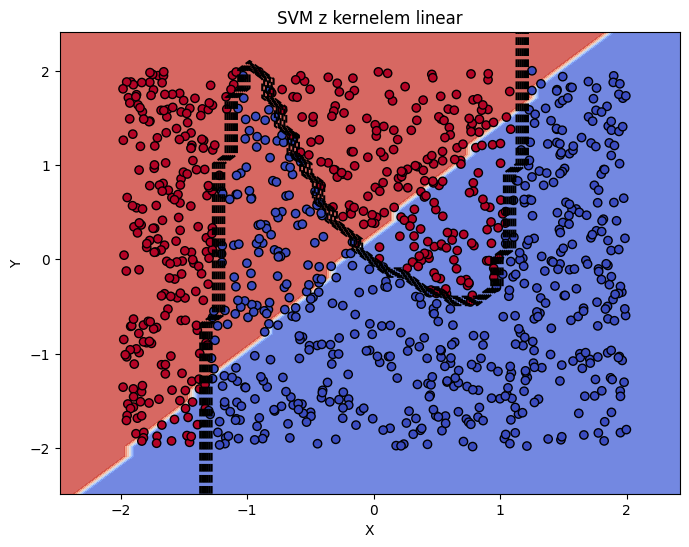

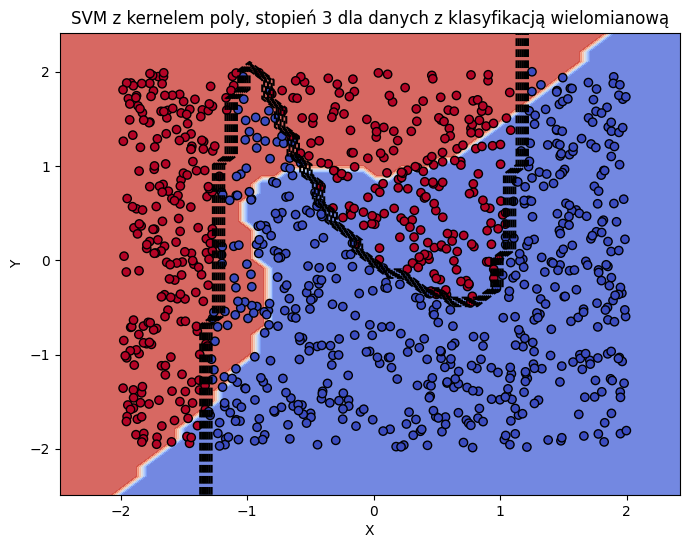

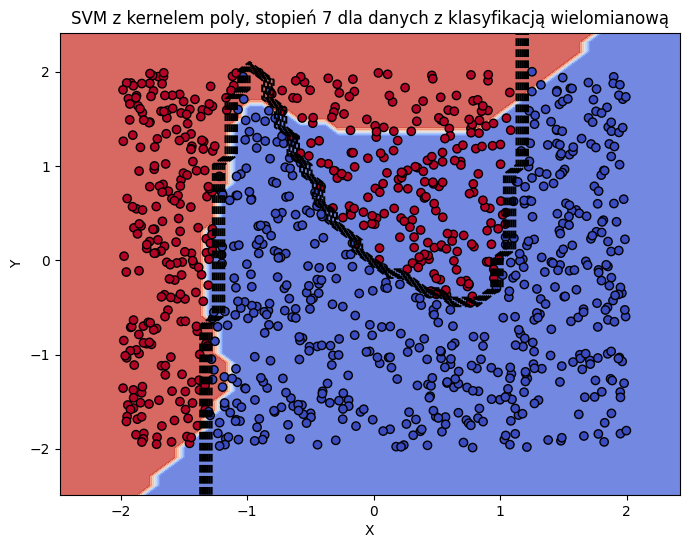

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generowanie danych
num_samples = 1000
np.random.seed(42)
X = np.random.uniform(-2, 2, size=(num_samples, 2))

# Funkcja wielomianowa do klasyfikacji
def polynomial_classifier(X):
    return np.where(X[:, 1]>X[:, 0]**7 - X[:, 0]**3 + X[:, 0]**2 - X[:, 0]**1, 1, 0)

# Przypisanie etykiet klas na podstawie funkcji wielomianowej
y = polynomial_classifier(X)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definicja kerneli i stopni wielomianu
kernels = ['linear', 'poly']
degrees = [3, 7]

# Tworzenie wykresów dla różnych kerneli i stopni wielomianu
for kernel in kernels:
    if kernel == 'poly':
        for degree in degrees:
            # Tworzenie i trenowanie modelu SVM z określonym stopniem wielomianu
            model_svm = SVC(kernel=kernel, degree=degree, random_state=42)
            model_svm.fit(X_train, y_train)

            # Wizualizacja wyników klasyfikacji SVM
            plt.figure(figsize=(8, 6))

            # Zakres wykresu
            x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
            y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

            # Klasyfikacja punktów na siatce
            Z = model_svm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            # Wykres z granicą decyzyjną
            plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
            plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')

            # Dodanie wizualizacji funkcji wielomianowej (granicy klas)
            plt.contour(xx, yy, polynomial_classifier(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape),
                        colors='black', linestyles='dashed')

            plt.title(f'SVM z kernelem {kernel}, stopień {degree} dla danych z klasyfikacją wielomianową')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.show()
    else:
        # Tworzenie i trenowanie modelu SVM dla kernela liniowego
        model_svm = SVC(kernel=kernel, random_state=42)
        model_svm.fit(X_train, y_train)

        # Wizualizacja wyników klasyfikacji SVM
        plt.figure(figsize=(8, 6))

        # Zakres wykresu
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

          # Klasyfikacja punktów na si
        Z = model_svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Wykres z granicą decyzyjną
        plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')

        # Dodanie wizualizacji funkcji wielomianowej (granicy klas)
        plt.contour(xx, yy, polynomial_classifier(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape),
                    colors='black', linestyles='dashed')

        plt.title(f'SVM z kernelem {kernel}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

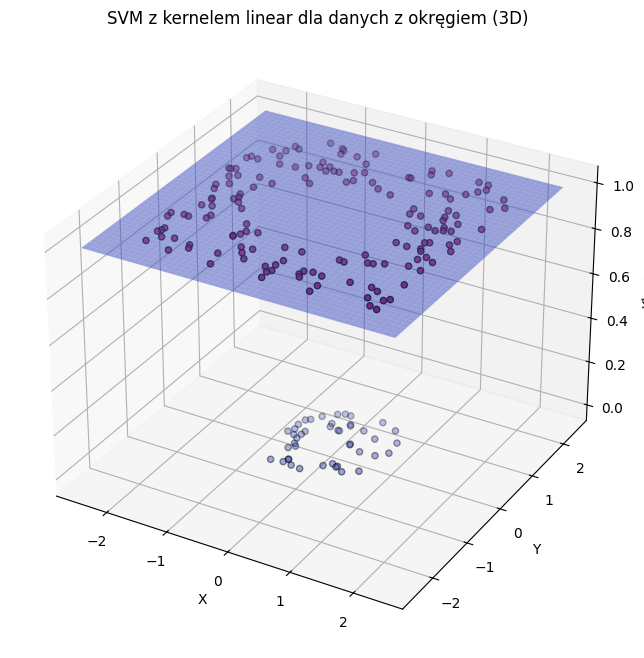

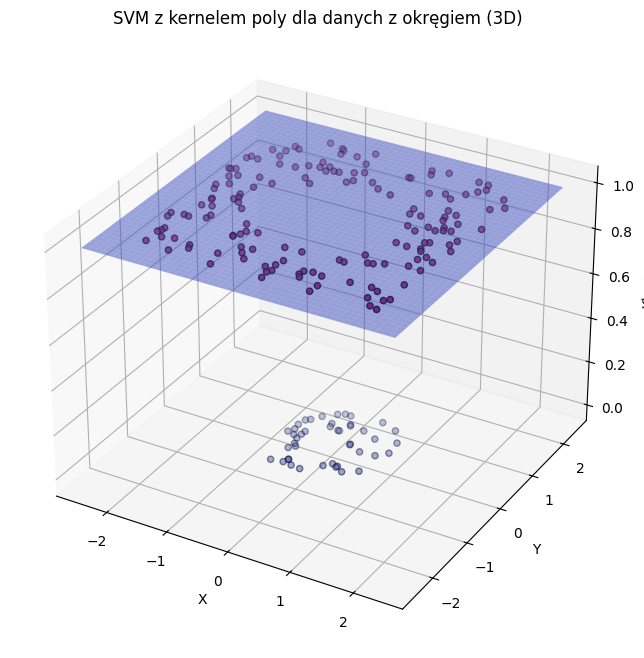

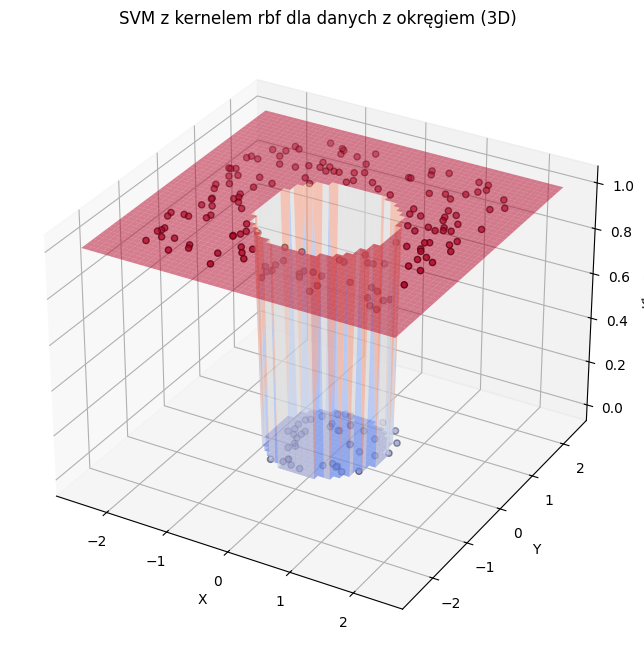

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# Generowanie danych
num_samples = 200
X = np.random.uniform(-2, 2, size=(num_samples, 2))  # Losowe punkty (x, y) w zakresie [-2, 2]
y = np.where(np.sum(X**2, axis=1) <= 1, 0, 1)  # Klasyfikacja: wewnątrz okręgu (klasa 0), na zewnątrz (klasa 1)

# Definicja kerneli
kernels = ['linear', 'poly', 'rbf']

# Tworzenie wykresów dla różnych kerneli
for kernel in kernels:
    # Tworzenie i trenowanie modelu SVM
    model_svm = SVC(kernel=kernel, random_state=42)
    model_svm.fit(X, y)

    # Wizualizacja wyników klasyfikacji SVM w 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Zakres wykresu
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Klasyfikacja punktów na siatce
    Z = model_svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Wykres powierzchni decyzyjnej
    ax.plot_surface(xx, yy, Z, alpha=0.5, cmap='coolwarm')

    # Wykres punktów danych
    ax.scatter(X[:, 0], X[:, 1], y, c=y, edgecolors='k', marker='o', cmap='coolwarm')

    # Ustawienia wykresu
    ax.set_title(f'SVM z kernelem {kernel} dla danych z okręgiem (3D)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Klasa')
    plt.show()